## Summary Statistics

This notebook creates a box-plot visualization of the variance of different pollutants in each month for different cities. The data is read from the corresponding csv file images/<year>_7cities.csv. This is AQI data that has not been filtered

In this notebook, I plot two versions, the median and max of each day's readings.  

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('seaborn-bright')

In [43]:
year = 2020
df = pd.read_csv(f'data/{year}_7cities.csv')

## A quick look at the data, make sure we understand what's what

In [44]:
df.describe()

,Unnamed: 0,count,min,max,median,variance
count,7601.000000,7601.000000,7601.000000,7601.000000,7601.000000,7.601000e+03
mean,23984.933430,240.115116,10.097619,127.783936,32.037087,8.903786e+03
std,13729.674807,252.138874,19.757924,192.520101,43.235384,3.784529e+04
min,2977.000000,2.000000,0.100000,1.000000,0.400000,0.000000e+00
25%,6892.000000,72.000000,0.300000,24.300000,4.900000,2.123800e+02
50%,26871.000000,177.000000,1.300000,65.400000,9.900000,9.360800e+02
75%,37973.000000,246.000000,7.300000,135.000000,52.000000,3.935120e+03
max,43381.000000,946.000000,158.000000,999.000000,392.000000,1.273200e+06


In [45]:
df.head()

,Unnamed: 0,Date,Country,City,Specie,count,min,max,median,variance
0,2977,28/02/2020,IN,Hyderabad,no2,96,3.0,32.7,12.2,405.29
1,2978,09/03/2020,IN,Hyderabad,no2,120,0.3,27.1,8.2,403.07
2,2979,06/04/2020,IN,Hyderabad,no2,95,0.1,31.2,6.1,848.08
3,2980,11/04/2020,IN,Hyderabad,no2,113,0.2,500.0,7.4,43973.00
4,2981,08/05/2020,IN,Hyderabad,no2,120,0.8,23.1,7.8,492.57


In [46]:
df.dtypes

Unnamed: 0      int64
Date           object
Country        object
City           object
Specie         object
count           int64
min           float64
max           float64
median        float64
variance      float64
dtype: object

OK! Most of the columns seem fine, but the Date is listed as an object. Let's fix this, so we can use this data correctly.

We will want to group the data according to month, so let's also create the corresponding columns.

In [47]:
df.Date = pd.to_datetime(df.Date, format = '%d/%m/%Y') # need the format string to specify which is the month and which is the year
df['month_num'] = pd.DatetimeIndex(df['Date']).month
df['month_name'] = df.Date.dt.month_name()
df.dtypes

Unnamed: 0             int64
Date          datetime64[ns]
Country               object
City                  object
Specie                object
count                  int64
min                  float64
max                  float64
median               float64
variance             float64
month_num              int64
month_name            object
dtype: object

In [48]:
df.head()

,Unnamed: 0,Date,Country,City,Specie,count,min,max,median,variance,month_num,month_name
0,2977,2020-02-28,IN,Hyderabad,no2,96,3.0,32.7,12.2,405.29,2,February
1,2978,2020-03-09,IN,Hyderabad,no2,120,0.3,27.1,8.2,403.07,3,March
2,2979,2020-04-06,IN,Hyderabad,no2,95,0.1,31.2,6.1,848.08,4,April
3,2980,2020-04-11,IN,Hyderabad,no2,113,0.2,500.0,7.4,43973.00,4,April
4,2981,2020-05-08,IN,Hyderabad,no2,120,0.8,23.1,7.8,492.57,5,May


In [49]:
print(df.shape)
# just keep 2019 data, discard everything else
df = df[df['Date'].dt.year == year]
print(df.shape)

(7601, 12)
(7518, 12)


In [50]:
df.head()

,Unnamed: 0,Date,Country,City,Specie,count,min,max,median,variance,month_num,month_name
0,2977,2020-02-28,IN,Hyderabad,no2,96,3.0,32.7,12.2,405.29,2,February
1,2978,2020-03-09,IN,Hyderabad,no2,120,0.3,27.1,8.2,403.07,3,March
2,2979,2020-04-06,IN,Hyderabad,no2,95,0.1,31.2,6.1,848.08,4,April
3,2980,2020-04-11,IN,Hyderabad,no2,113,0.2,500.0,7.4,43973.00,4,April
4,2981,2020-05-08,IN,Hyderabad,no2,120,0.8,23.1,7.8,492.57,5,May


In [51]:
#just to make this generic
cities = df.City.unique()
pollutants = df.Specie.unique()

print(cities)
print(pollutants)

## using 'annual mean' unless otherwise specified
pollutant_who = {}
pollutant_who['co']   = 0
pollutant_who['no2']  = 40
pollutant_who['o3']   = 100 ##  8-hour mean
pollutant_who['pm10'] = 20
pollutant_who['pm25'] = 10
pollutant_who['so2']  = 20  ## 24-hour mean

## annual in 'industrial, residential, rural, others' areas
pollutant_naaqs = {}
pollutant_naaqs['co']   = 2   ##  8-hour mean
pollutant_naaqs['no2']  = 40
pollutant_naaqs['o3']   = 100 ##  8-hour mean
pollutant_naaqs['pm10'] = 60
pollutant_naaqs['pm25'] = 40
pollutant_naaqs['so2']  = 80  ## 24-hour mean


['Hyderabad' 'Delhi' 'Chennai' 'Visakhapatnam' 'Mumbai' 'Bengaluru'
 'Kolkata']
['no2' 'pm25' 'pm10' 'o3' 'so2' 'co']


---

I'm really, really partial to making grids of plots myself!

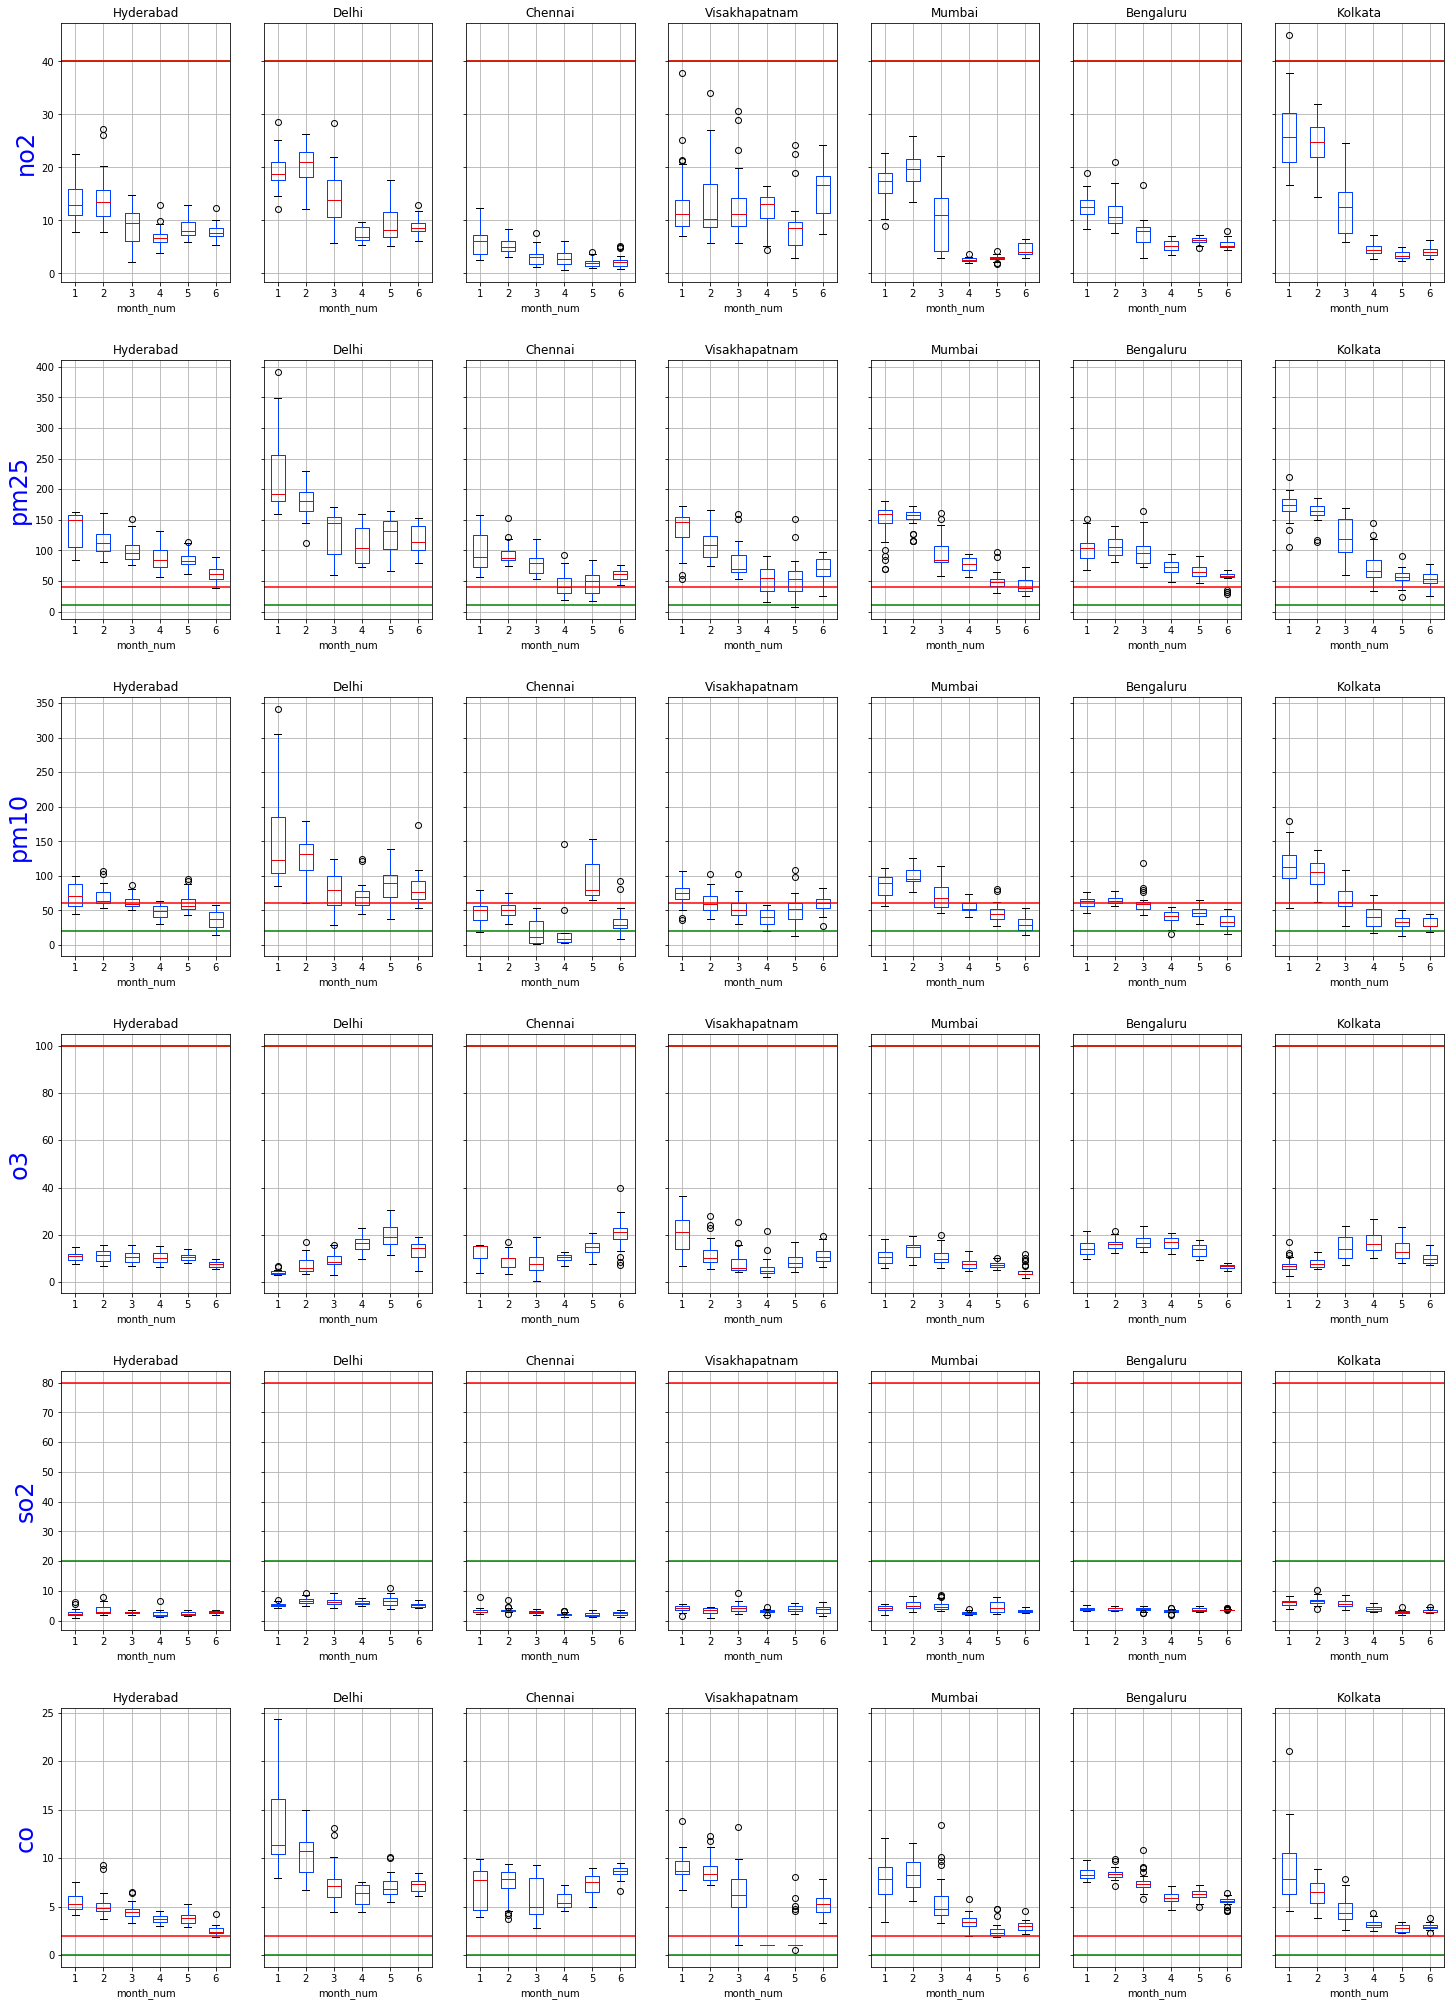

In [52]:
fig, ax = plt.subplots(len(pollutants), len(cities), figsize=(24,36), sharey='row')
plt.subplots_adjust(hspace=0.3) ## the hspace value is a fraction of the average axes height

# For each pollutant, and each city, create a box plot, and put it in the correct (pollutant, city) location
for i, p in enumerate(pollutants):
    d = df[(df.Specie == p)] # extract the pollutant data
    for j, c in enumerate(cities):
        a = ax[i][j] # figure out the axes to use
        d[d.City == c].boxplot(column='median', by='month_num', ax=a)
        a.axhline(y=pollutant_who[p], c='g')
        a.axhline(y=pollutant_naaqs[p], c='r')
        a.set_title(c)

for a, r in zip(ax[:,0], pollutants):
    a.set_ylabel(r, rotation=90, fontsize=24, color='b')
    
#plt.title('') # SKK: I need to figure this out. If I uncomment this line, the argument shows up as the title of the last subfigure!
plt.suptitle('')
plt.show()
fig.savefig(f'images/pollutants-cities-{year}.png', bbox_inches='tight')
plt.close()

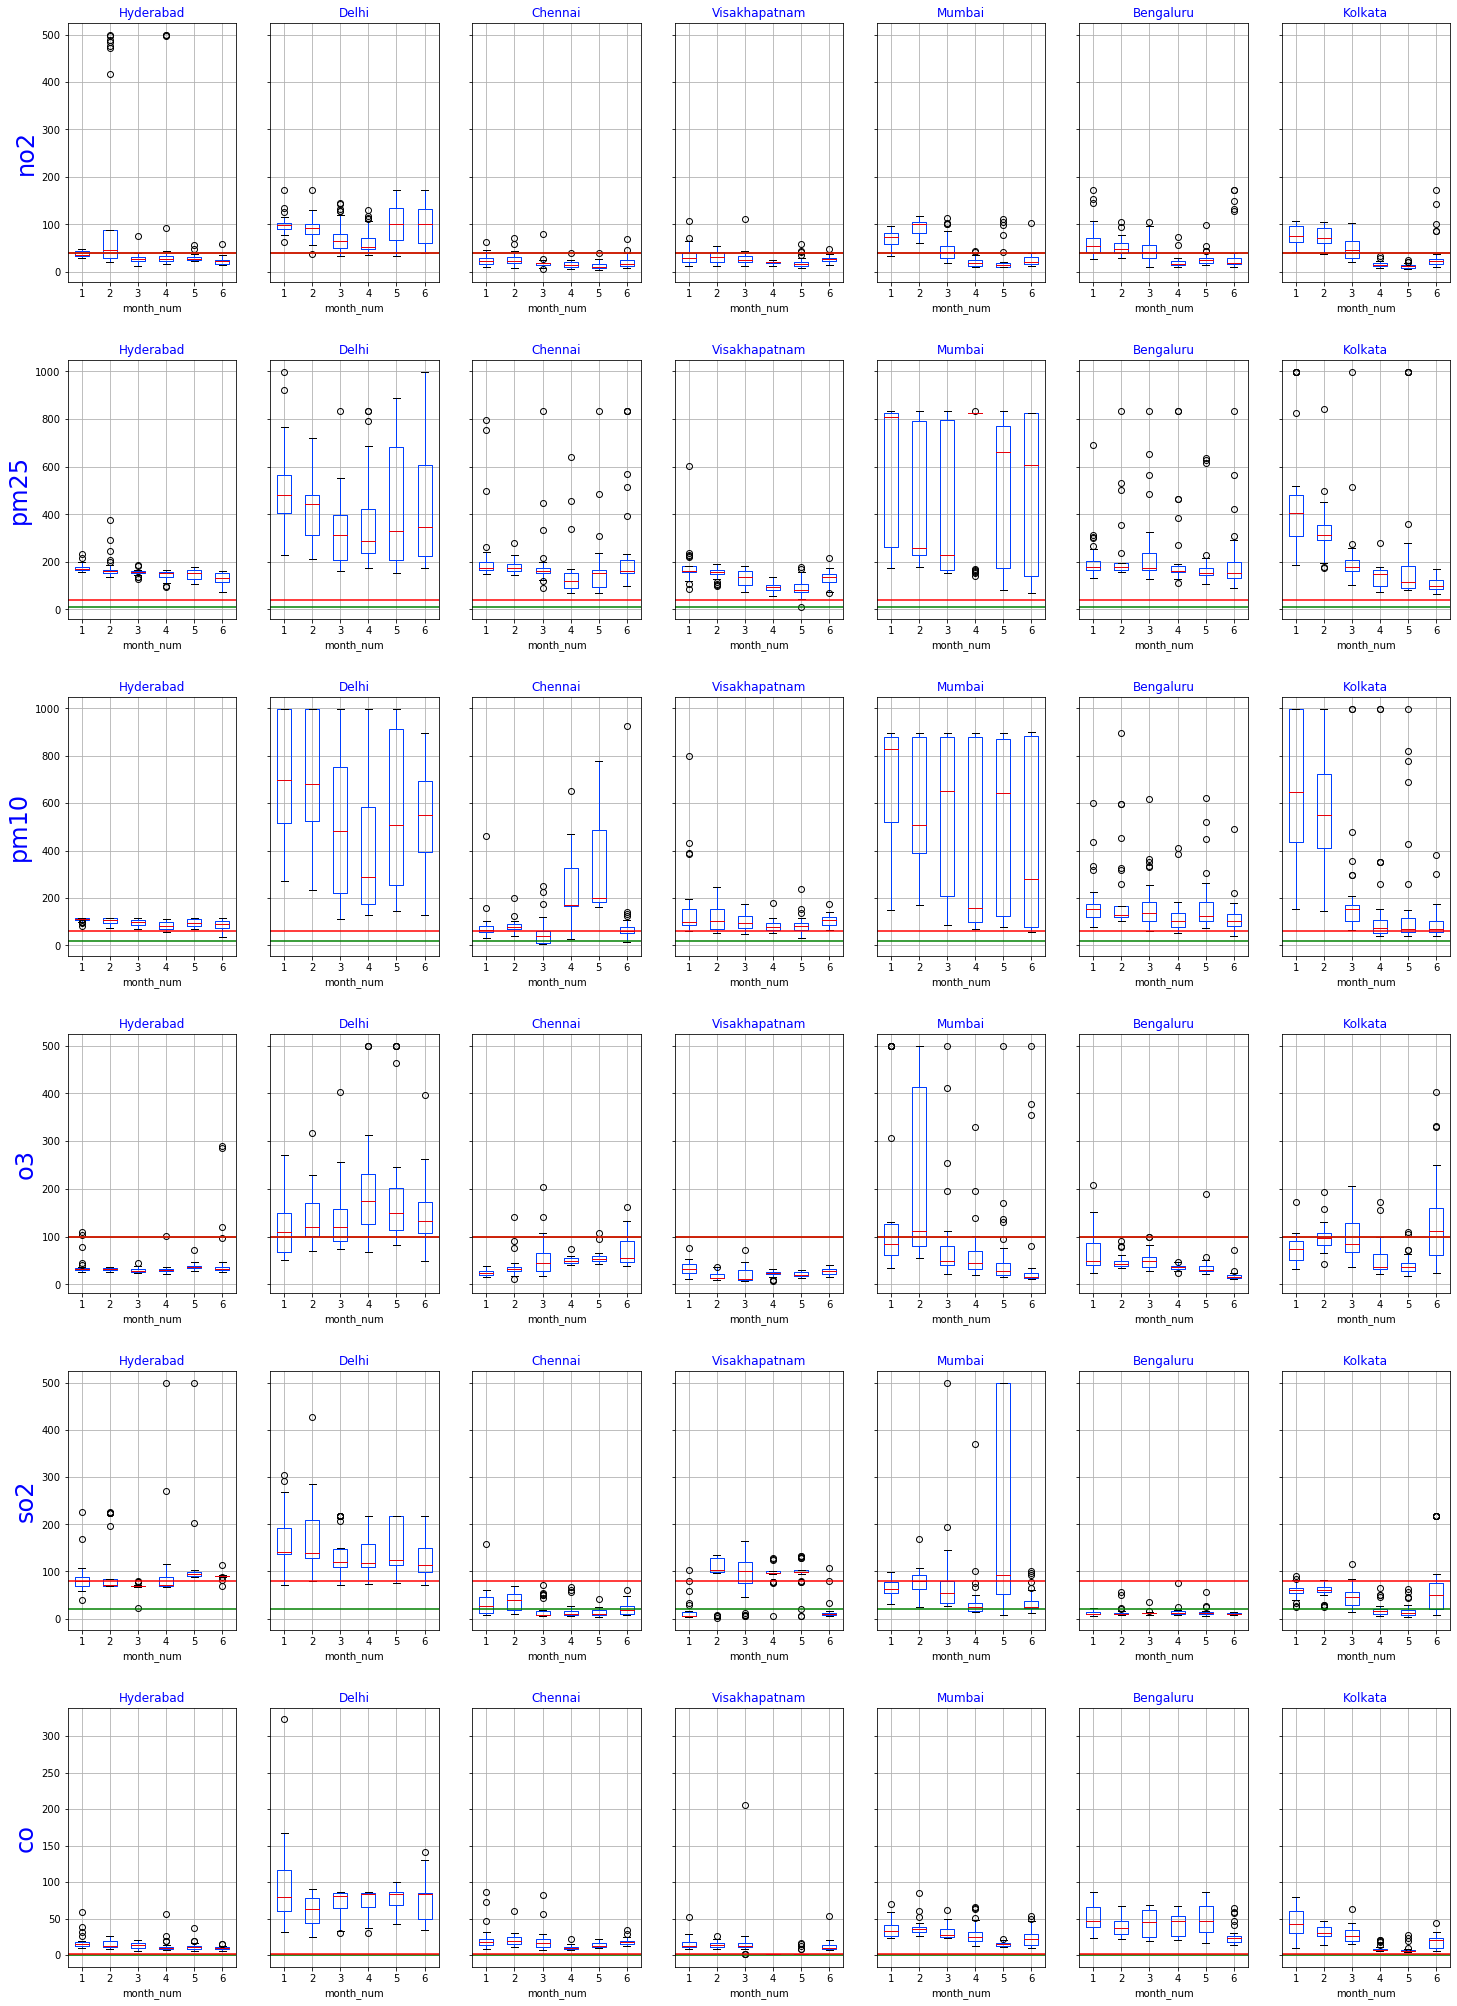

In [53]:
fig, ax = plt.subplots(len(pollutants), len(cities), figsize=(24,36), sharey='row')
plt.subplots_adjust(hspace=0.3)

## same as the plot above, but using the daily max, rather than the daily median values for each month
for i, p in enumerate(pollutants):
    d = df[df.Specie == p]
    for j, c in enumerate(cities):
        
        a = ax[i][j]
        d[d.City == c].boxplot(column='max', by='month_num', ax=a)
        a.set_title(c, color='blue')
        a.axhline(y=pollutant_who[p], c='g')
        a.axhline(y=pollutant_naaqs[p], c='r')

for a, r in zip(ax[:,0], pollutants):
    a.set_ylabel(r, rotation=90, fontsize=24, color='b')
#plt.title('')
plt.suptitle('')
plt.show()
fig.savefig(f'images/pollutants-cities-max-{year}.png', bbox_inches='tight')
plt.close()

And finally, we can plot these per city:

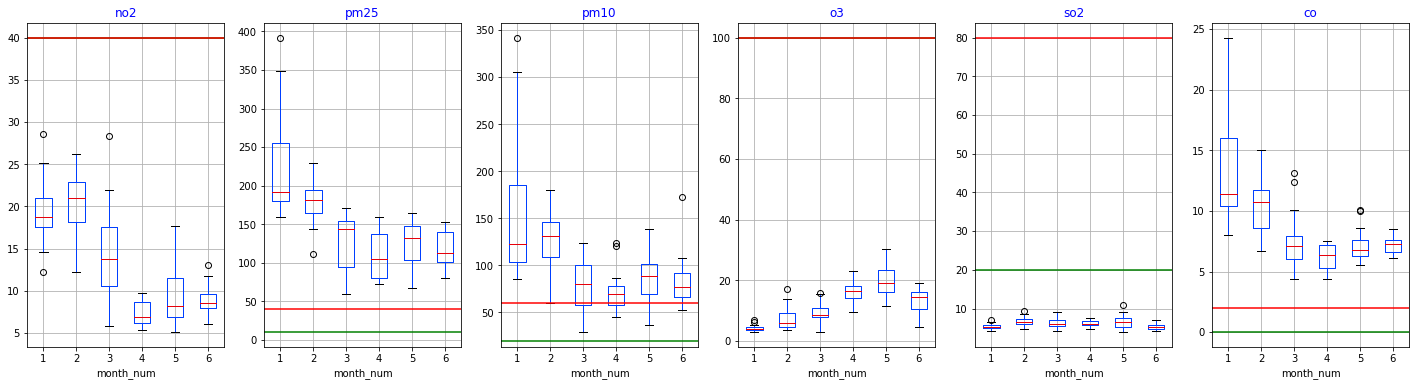

In [ ]:
fig, ax = plt.subplots(1, len(pollutants), figsize=(24,6))

city = 'Delhi'
for i, p in enumerate(pollutants):
    d = df[df.Specie == p]     
    a = ax[i]
    d[d.City == city].boxplot(column='median', by='month_num', ax=a)
    a.set_title(p, color='blue')
    a.axhline(y=pollutant_who[p], c='g')
    a.axhline(y=pollutant_naaqs[p], c='r')
plt.suptitle('')
plt.show()
#plt.savefig(f'images/Delhi-poll-{year}.png')

In [ ]:
## individual plots of pollutants for each city
for c in cities:
    fig, ax = plt.subplots(1, len(pollutants), figsize=(24,6))
    for i, p in enumerate(pollutants):
        d = df[df.Specie == p]     
        a = ax[i]
        d[d.City == c].boxplot(column='median', by='month_num', ax=a)
        a.set_title(p, color='blue')
        a.axhline(y=pollutant_who[p], c='g')
        a.axhline(y=pollutant_naaqs[p], c='r')
        plt.suptitle(f'{c}', c='b', fontsize=24)
        plt.savefig(f"images/{c}-pollutants-{year}.png")
    plt.close()

In [ ]:
## plots of pollutants across cities
for p in pollutants:
    fig, ax = plt.subplots(1, len(cities), figsize=(24,6), sharey=True)
    d = df[df.Specie == p]
    for i, c in enumerate(cities):
        a = ax[i]
        d[d.City == c].boxplot(column='median', by='month_num', ax=a)
        a.set_title(c)
        a.axhline(y=pollutant_who[p], c='g')
        a.axhline(y=pollutant_naaqs[p], c='r')
        plt.suptitle(f'{p}', c='b', fontsize=20)
        plt.savefig(f"images/{p}-cities-{year}.png")
    plt.close()


In [ ]:
fig, ax = plt.subplots(len(cities), len(pollutants), figsize=(24,36))
plt.subplots_adjust(hspace=0.3)

for i, c in enumerate(cities):
    d = df[df.City == c] 
    for j, p in enumerate(pollutants):
        a = ax[i][j]
        d[d.Specie == p].boxplot(column='median', by='month_num', ax=a)
        a.set_title(p, color='blue')
        a.axhline(y=pollutant_who[p], c='g')
        a.axhline(y=pollutant_naaqs[p], c='r')
        
for a, r in zip(ax[:,0], cities):
    a.set_ylabel(r, rotation=90, fontsize=24, color='b')
    
plt.suptitle('')
plt.show()
fig.savefig(f'images/cities-pollutants-{year}.png', bbox_inches='tight')
plt.close()

In [ ]:
fig, ax = plt.subplots(len(cities), len(pollutants), figsize=(24,36))
plt.subplots_adjust(hspace=0.3)

for i, c in enumerate(cities):
    d = df[df.City == c] 
    for j, p in enumerate(pollutants):
        a = ax[i][j]
        d[d.Specie == p].boxplot(column='max', by='month_num', ax=a)
        a.set_title(p, color='blue')
        a.axhline(y=pollutant_who[p], c='g')
        a.axhline(y=pollutant_naaqs[p], c='r')
        
for a, r in zip(ax[:,0], cities):
    a.set_ylabel(r, rotation=90, fontsize=24, color='b')
    
plt.suptitle('')
plt.show()
fig.savefig(f'images/cities-pollutants-max-{year}.png', bbox_inches='tight')
plt.close()